# Rachel Ward - M11 Assignment

## DAV 6150

## Introduction

In this assignment I will be comparing the performance of decision tree models and random forest models to predict a specific attribute of a dataset on mushrooms.

While the performance of a random forest model is typically expected to be better than the performance of a single decision tree, there is a trade-off between complexity and performance, and this trade-off must be considered when deciding the best model to use. 

The data set I will be working with is a set of attributes that describe the physical characteristics of mushrooms. This dataset originally comes from [UCI.](https://archive.ics.uci.edu/ml/datasets/mushroom) For this assignment, my decision tree and random forest models will be designed with the purpose of predicting which of the four values of my response variable, veil-color, is most likely to apply to a given observation.

To accomplish this task I will perform the following steps:
* **Exploratory Data Analysis ("EDA"):** As part of my exploratory data analysis, I will analyze the nature of each of the attributes, and try to identify any variables that seem to be good at predicting veil-color.
* **Data Preparation:** During the data preparation step I will address any data integrity issues and perform any necessary feature engineering techniques.
* **Prepped Data Review:** For this step I will perform another EDA on my attributes after my data preparation to see how the nature of the variables changed and again look to see if there are any good predictors. 
* **Decision Tree + Random Forest Modeling:** In this step I will select my features and reduce the dimensionality if necessary, as well as select the hyperparameters for my models. I will then create two decision tree models and two random forest models and evaluate the performance of each model.
* **Model Selection:** After creating the models, I will compare the performance of the two models, and select my preferred model. I will then apply my preferred model to the testing subset and evaluate the results to see if it performed as well as expected. 
* **Conclusions:** After selecting my model I will conclude this assignment offering any insight I've gained or suggestions for future work.

## EDA 

In this step I will analyze the nature of each of the attributes and attempt to identify any variables that seem to be good at predicting veil-color. I will first read in the file, re-name the columns if necessary, and check for missing values.

In [1]:
#first import the libraries I will be using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#now read in the file; from looking at the dataset there are no headers
filename = "https://raw.githubusercontent.com/rachelward617/DAV-6150/master/M11_Data.csv"
shrooms = pd.read_csv(filename, header = None)

#check results
shrooms.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Since the dataset does not have headers, I will now name the columns appropriately, following the list of columns provided on the UCI website which is linked above. For ease of reference, this is the list of attributes and their potential values:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [2]:
#rename the columns to meaningful names
shrooms.rename(columns={0: "poisonous", 1: "cap_shape", 2: 'cap_surface',
                        3: "cap_color", 4: 'bruises', 5: "odor", 6: 'gill_attachment',
                        7: 'gill_spacing', 8: "gill_size", 9: "gill_color", 10: "stalk_shape",
                        11: "stalk_root", 12: "stalk_surface_above_ring", 13: "stalk_surface_below_ring",
                        14: "stalk_color_above_ring", 15: "stalk_color_below_ring", 16: "veil_type",
                        17: "veil_color", 18: "ring_number", 19: "ring_type", 20: "spore_print_color", 
                        21: "population", 22: "habitat"}, inplace= True)

#check results
shrooms.head()

,poisonous,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
#check for missing values:
shrooms.isnull().sum()

poisonous                   0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

In [4]:
#get type of each column; also will tell us how many observations we have
shrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
poisonous                   8124 non-null object
cap_shape                   8124 non-null object
cap_surface                 8124 non-null object
cap_color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill_attachment             8124 non-null object
gill_spacing                8124 non-null object
gill_size                   8124 non-null object
gill_color                  8124 non-null object
stalk_shape                 8124 non-null object
stalk_root                  8124 non-null object
stalk_surface_above_ring    8124 non-null object
stalk_surface_below_ring    8124 non-null object
stalk_color_above_ring      8124 non-null object
stalk_color_below_ring      8124 non-null object
veil_type                   8124 non-null object
veil_color                  8124 non-null object
ring_number

Since there are no null values, and each column is the data type I was expecting, I will begin my EDA work by looking at the distribution of the response variable.

In [5]:
#replace the letter values with the color they represent to make the results easier to interpret
shrooms["veil_color"].replace({"n": "brown", "o": "orange", "w": "white", "y": "yellow"}, inplace=True)

#see how many of each class we have
shrooms["veil_color"].value_counts()

white     7924
brown       96
orange      96
yellow       8
Name: veil_color, dtype: int64

Looking at the above, we see that we definitely have imbalanced classes, since over 97% of the observations have "white" as their veil_color. I will decide later whether or not I should re-sample to balance the classes. Now that I have some basic information about the response variable, I will look at the frequency plots of each of the variables, since they are all categorical.

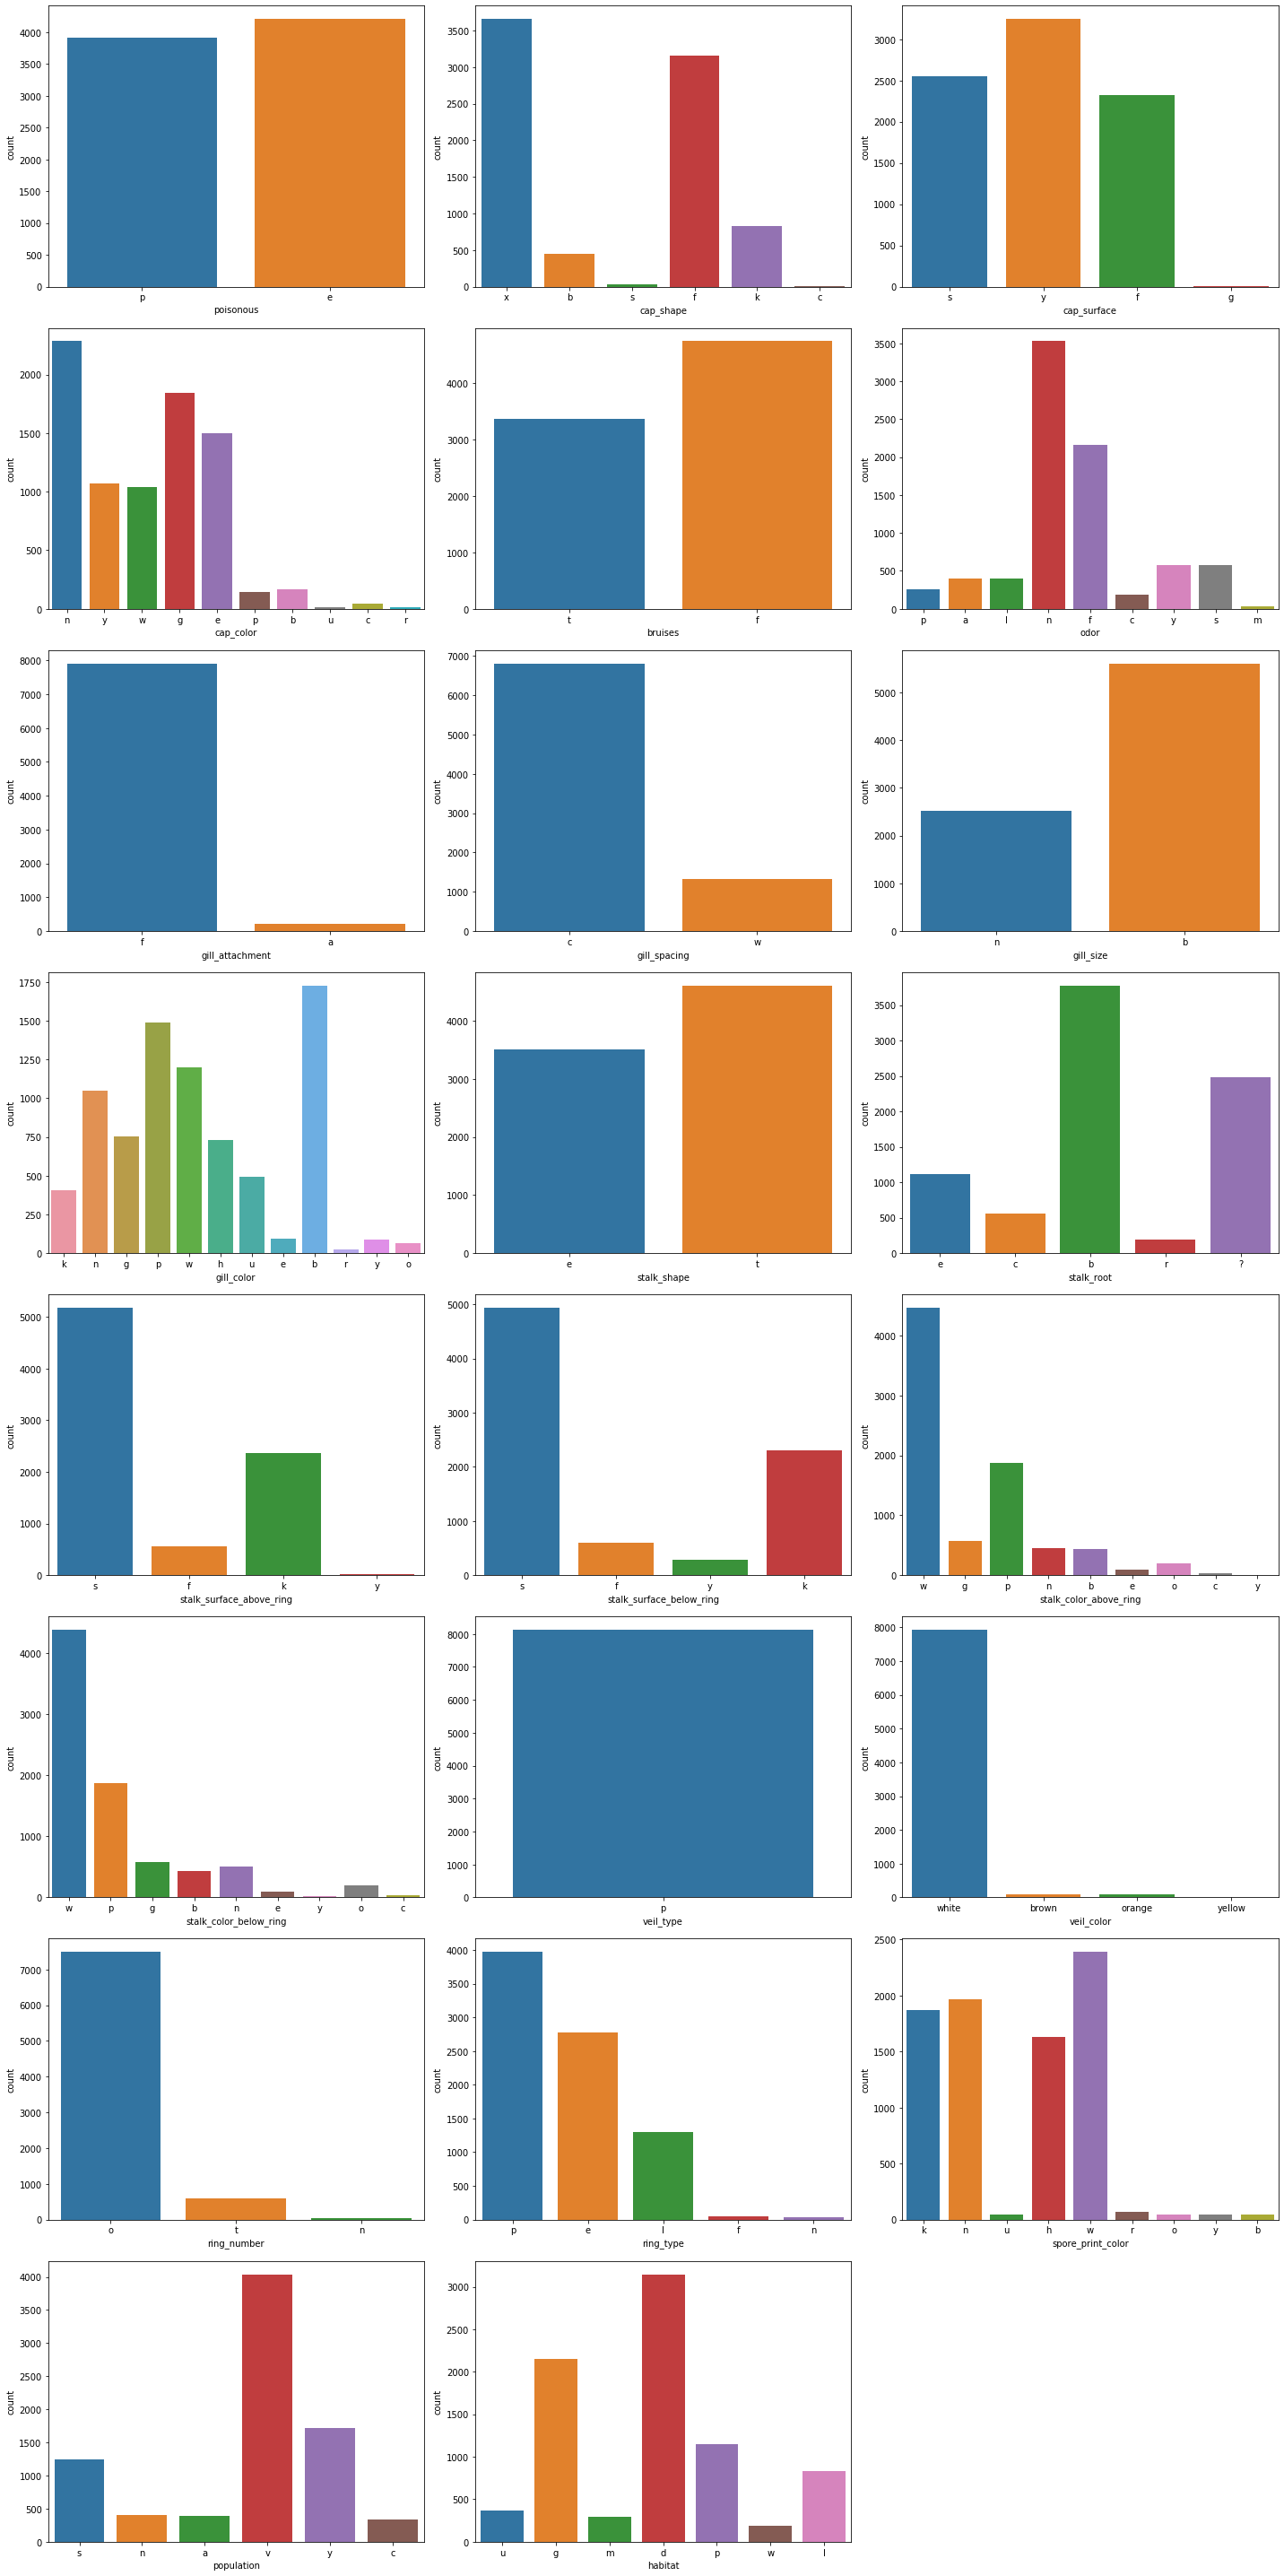

In [6]:
#set plot parameters
fig, ax = plt.subplots(8, 3, figsize=(20, 40))

#for each variable, graph a countplot
for variable, subplot in zip(shrooms, ax.flatten()):
    sns.countplot(shrooms[variable], ax=subplot) 
    ax.flat[-1].set_visible(False) #hide empty plot at the end
plt.tight_layout()

The above countplots show that there are many attributes with imbalanced classes, a few attributes where the classes are almost balanced, and one variable that has only one possible value.

The variable veil_type has only one possible value, 'p', which represents a partial veil type. Since each observation has this same information, it would be pointless to include this variable in the models because it adds no predictive value.

Additionally, stalk_root has nearly 2500 observations with a ? which, while it may appear to indicate null values, per the information on the dataset on the UCI, the ? indicates that the stalk_root was missing on the mushroom in that observation, so it is valid data. 

The variables poisonous, stalk_shape, and bruises are binary, and have almost balanced classes. 

As seen above, the response variable, veil_color, has imbalanced classes with almost the entire dataset consisting of observations that are 'white.' There are a few other variables where there are sparse classes, for example, spore_print_color, ring_type, ring_number, stalk_color_above_ring, stalk_color_below_ring, cap_color, cap_shape, and odor. I will first check to see if any of these are strong predictors before deciding if I should group the sparse classes. 

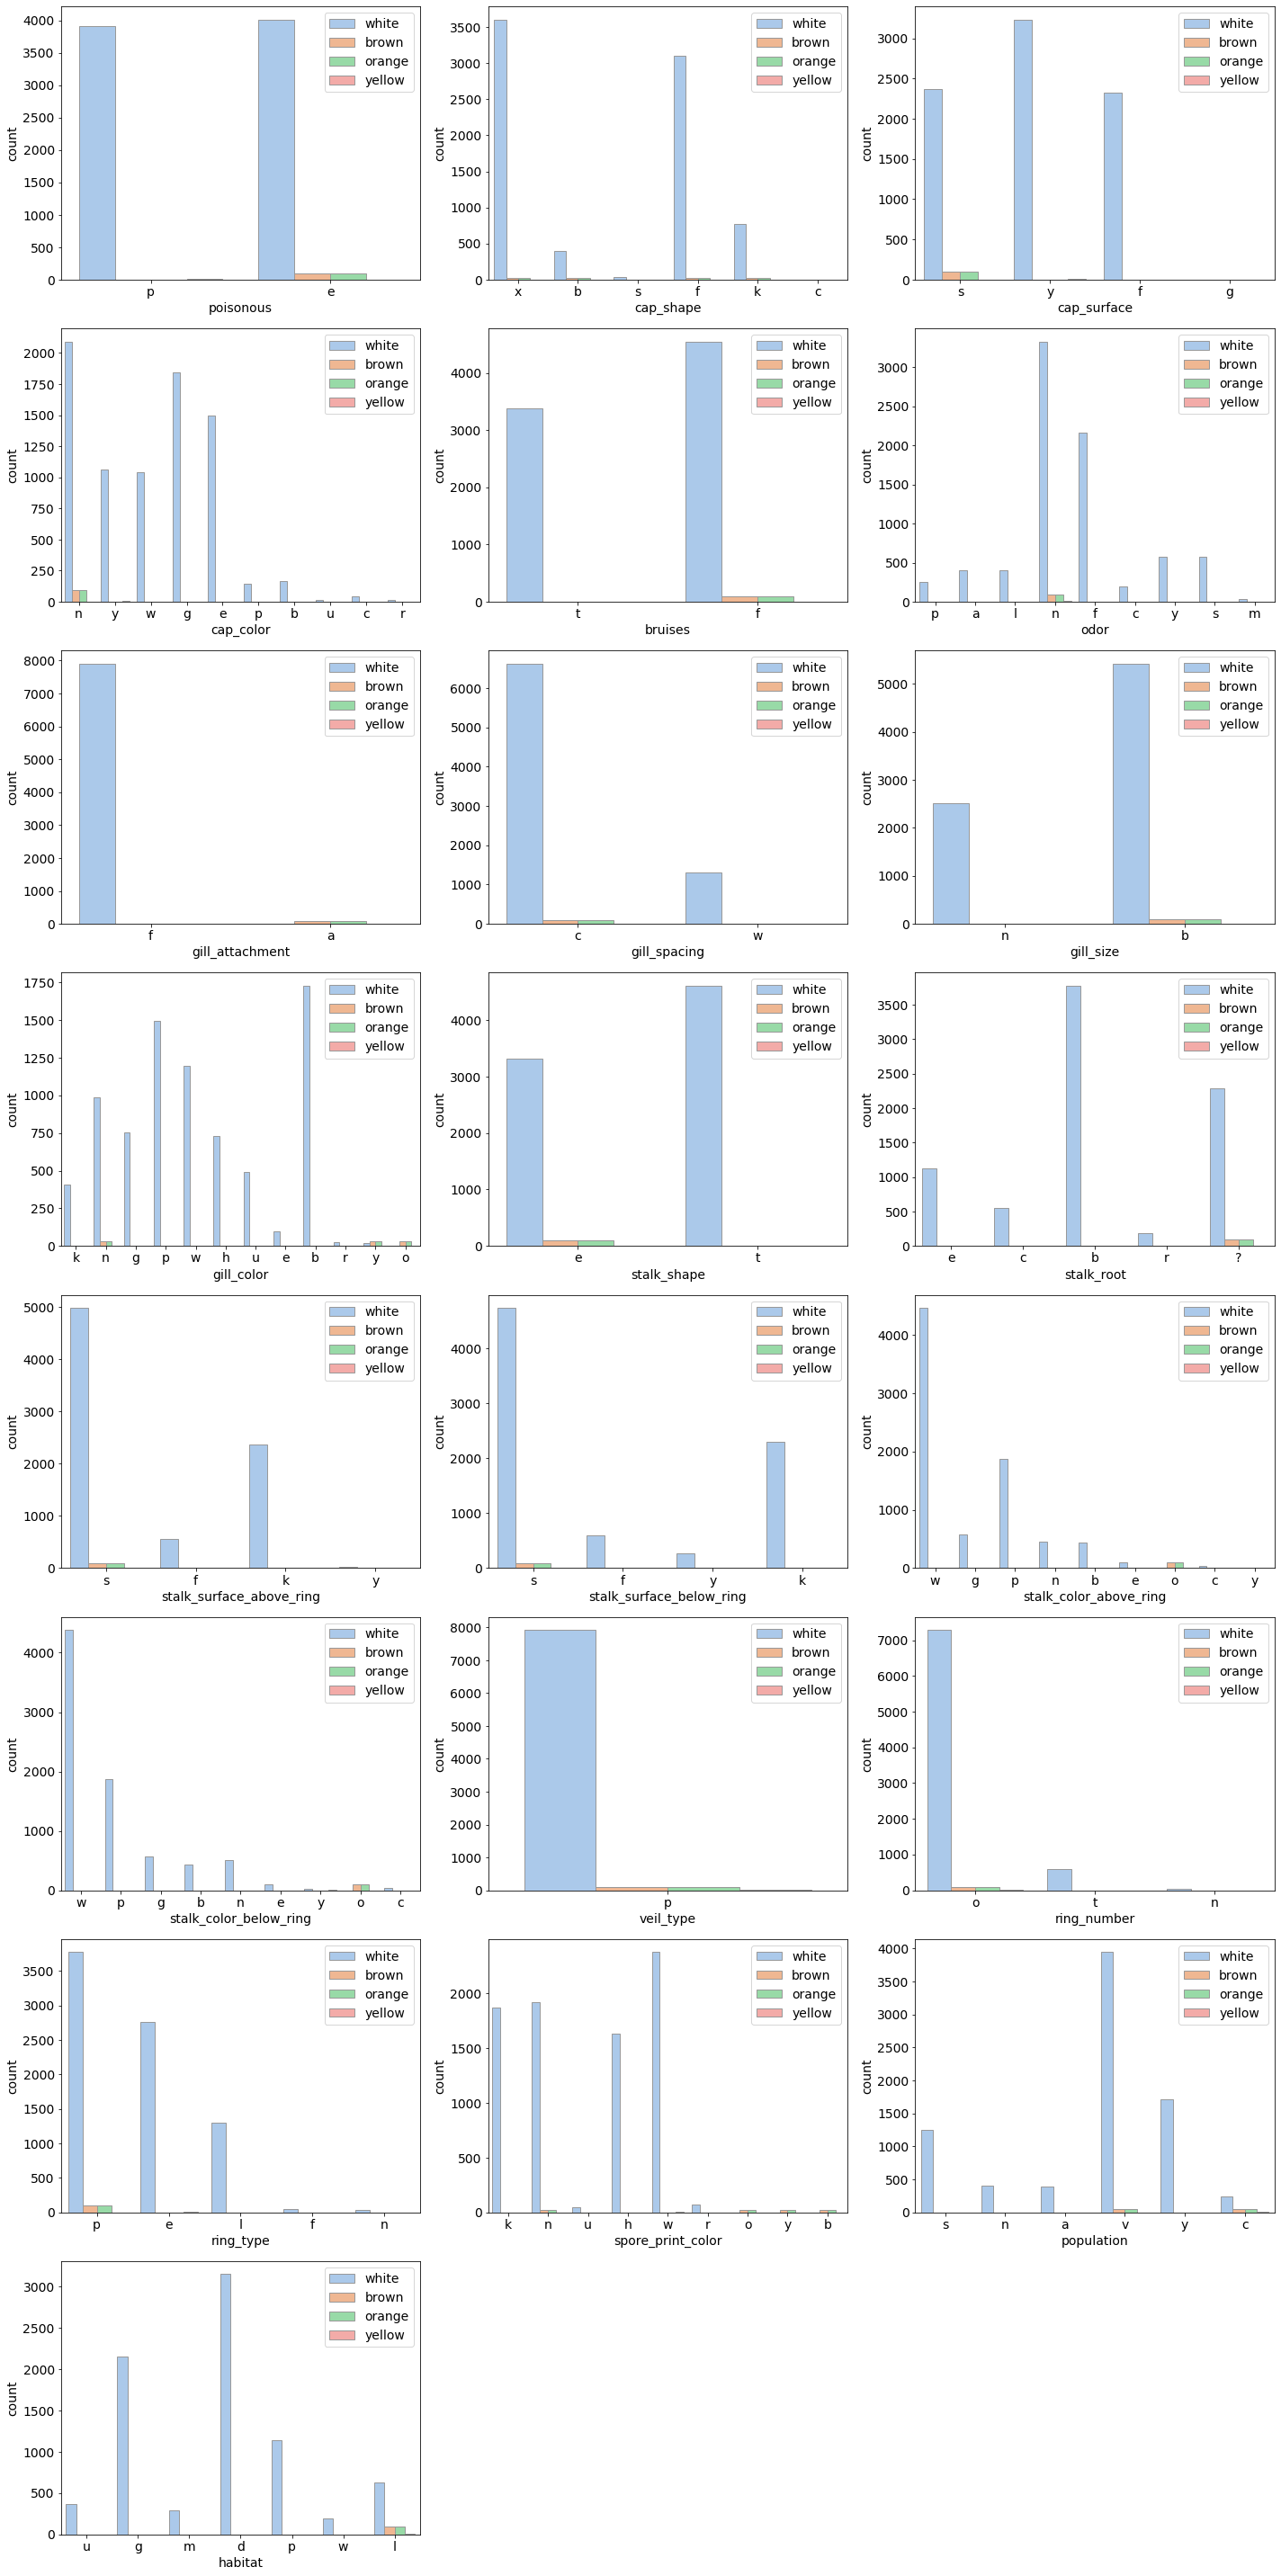

In [7]:
#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(20,40)}) 

shrooms_sans_target = shrooms.drop(columns = 'veil_color')
j=1
#for each variable except the target graph a side by side plot 
for k in shrooms_sans_target.columns.to_list():   
    plt.subplot(8,3,j) 
    sns.countplot(x=k, hue="veil_color",  palette="pastel", edgecolor=".6",data=shrooms)
    plt.legend(loc='upper right')
    j=j+1

plt.tight_layout()
#show results
plt.show()

From these graphs I note the following:
* The variable **poisonous** appears to be a good predictor - if the mushroom is poisonous, the veil color can only be white or yellow. Similarly, if the mushroom is edible, the veil_color cannot be yellow, but can be white, brown, or orange.
* For **cap_shape**, the cap-shape conical has too few values to see so we will look at those rows after this. The cap_shape sunken has only white as a veil_color, which could be a good predictor. The other cap shapes are a mixture of the veil_color.
* The **cap_surface** variable has 4 different possible values. Both scaly and smooth have observations with different veil_color, but fibrous and grooves have only white veil_color.
* The **cap_color** values of buff, cinnamon, red, gray, pink, green, purple, white are all exclusively associated with a veil_color of white. The remaining cap colors of brown and yellow are both associated with multiple different veil colors. 
* The **bruises** variable bruises has two possible values. If the observations had bruises, the veil color was white. If the observation did not have bruises, it could have any of the veil colors. 
* The **odor** variable has multiple values where the only associated veil_color was white. They are almond, foul, creosote, anise, musty, pungent, spicy, fishy. The only value which has other veil colors associated with it is 'none.'
* The **gill_attachment** variable does not appear to be a clear cut predictor as both possible values are associated with more than one veil color. 
* Similarly, the **gill_spacing** variable does not appear to be a clear cut predictor as it also has multiple veil colors associated with it. 
* The same is true for **gill_size** which does not appear to be a good predictor for the same reasons. 
* For **gill_color** the values buff, red, gray, chocolate, black, pink, green, and purple only have a veil_color of white associated with their observations. The remaining gill colors have a mixture of veil colors associated with them. 
* The **stalk_shape** variable has two possible values. The tapering value only has a veil_color of white associated it, while the value enlarging has multiple veil_colors associated with it. 
* The **stalk_root** variable has three values which only have a veil_color of white associated with it, which are bulbous, equal, and rooted.
* The **stalk_surface_above_ring** values fibrous and silky have a veil color of white associated with them, while the other values have multiple veil colors associated with them.
* Similarly, the **stalk_surface_below_ring** values fibrous and silky also have a veil color of white associated with them, while the other values have multiple veil colors associated with them. 
* For **stalk_color_above_ring**, the only value which clearly has a veil_color besides white associated with it is orange. There are so few value counts for yellow that we cannot see what veil_color is associated with it, so we will check that later on.
* The **stalk_color_below_ring** variable has only two values which have multiple veil_colors associated with it, orange and yellow, while the remaining all have a veil_color of white. 
* The **ring_number** values of none and two both only have a veil color of white associated with them, while a value of one has multiple veil colors. 
* The **ring_type** variable has three values which are only associated with a veil color of white, flaring, large, and none. The remaining values have multiple veil colors associated with them.
* The **spore_print_color** variable has four values which are only associated with a veil color of white which are chocolate, black, green, and purple. The remainder of the values have multiple veil colors associated with them. 
* The **population** variable has four values which are only associated with a veil color of white: abundant, numerous, scattered, and solitary. The remainder have multiple veil colors associated with them. 
* The only **habitat** value which is not only associate with a white veil color is leaves. The remaining values are all associated exclusively with a white veil color. 

Because of the imbalanced classes, it was difficult to see patterns in the data for the three non-white veil_colors. Therefore I will now create these same plots without the veil color white by creating a dataframe without rows where the veil_color was white.

In [8]:
#get a dataframe without the veil_color of white
shrooms_not_white = shrooms[shrooms['veil_color'] != 'white']
shrooms_not_white

,poisonous,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
6038,e,b,s,n,f,n,a,c,b,y,...,s,o,o,p,brown,o,p,n,c,l
6040,e,x,s,n,f,n,a,c,b,o,...,s,o,o,p,brown,o,p,n,v,l
6375,e,b,s,n,f,n,a,c,b,o,...,s,o,o,p,orange,o,p,o,v,l
6424,e,x,s,n,f,n,a,c,b,n,...,s,o,o,p,brown,o,p,y,c,l
6434,e,x,s,n,f,n,a,c,b,n,...,s,o,o,p,brown,o,p,o,v,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8115,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,orange,o,p,o,v,l
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,orange,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,brown,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,orange,o,p,b,c,l


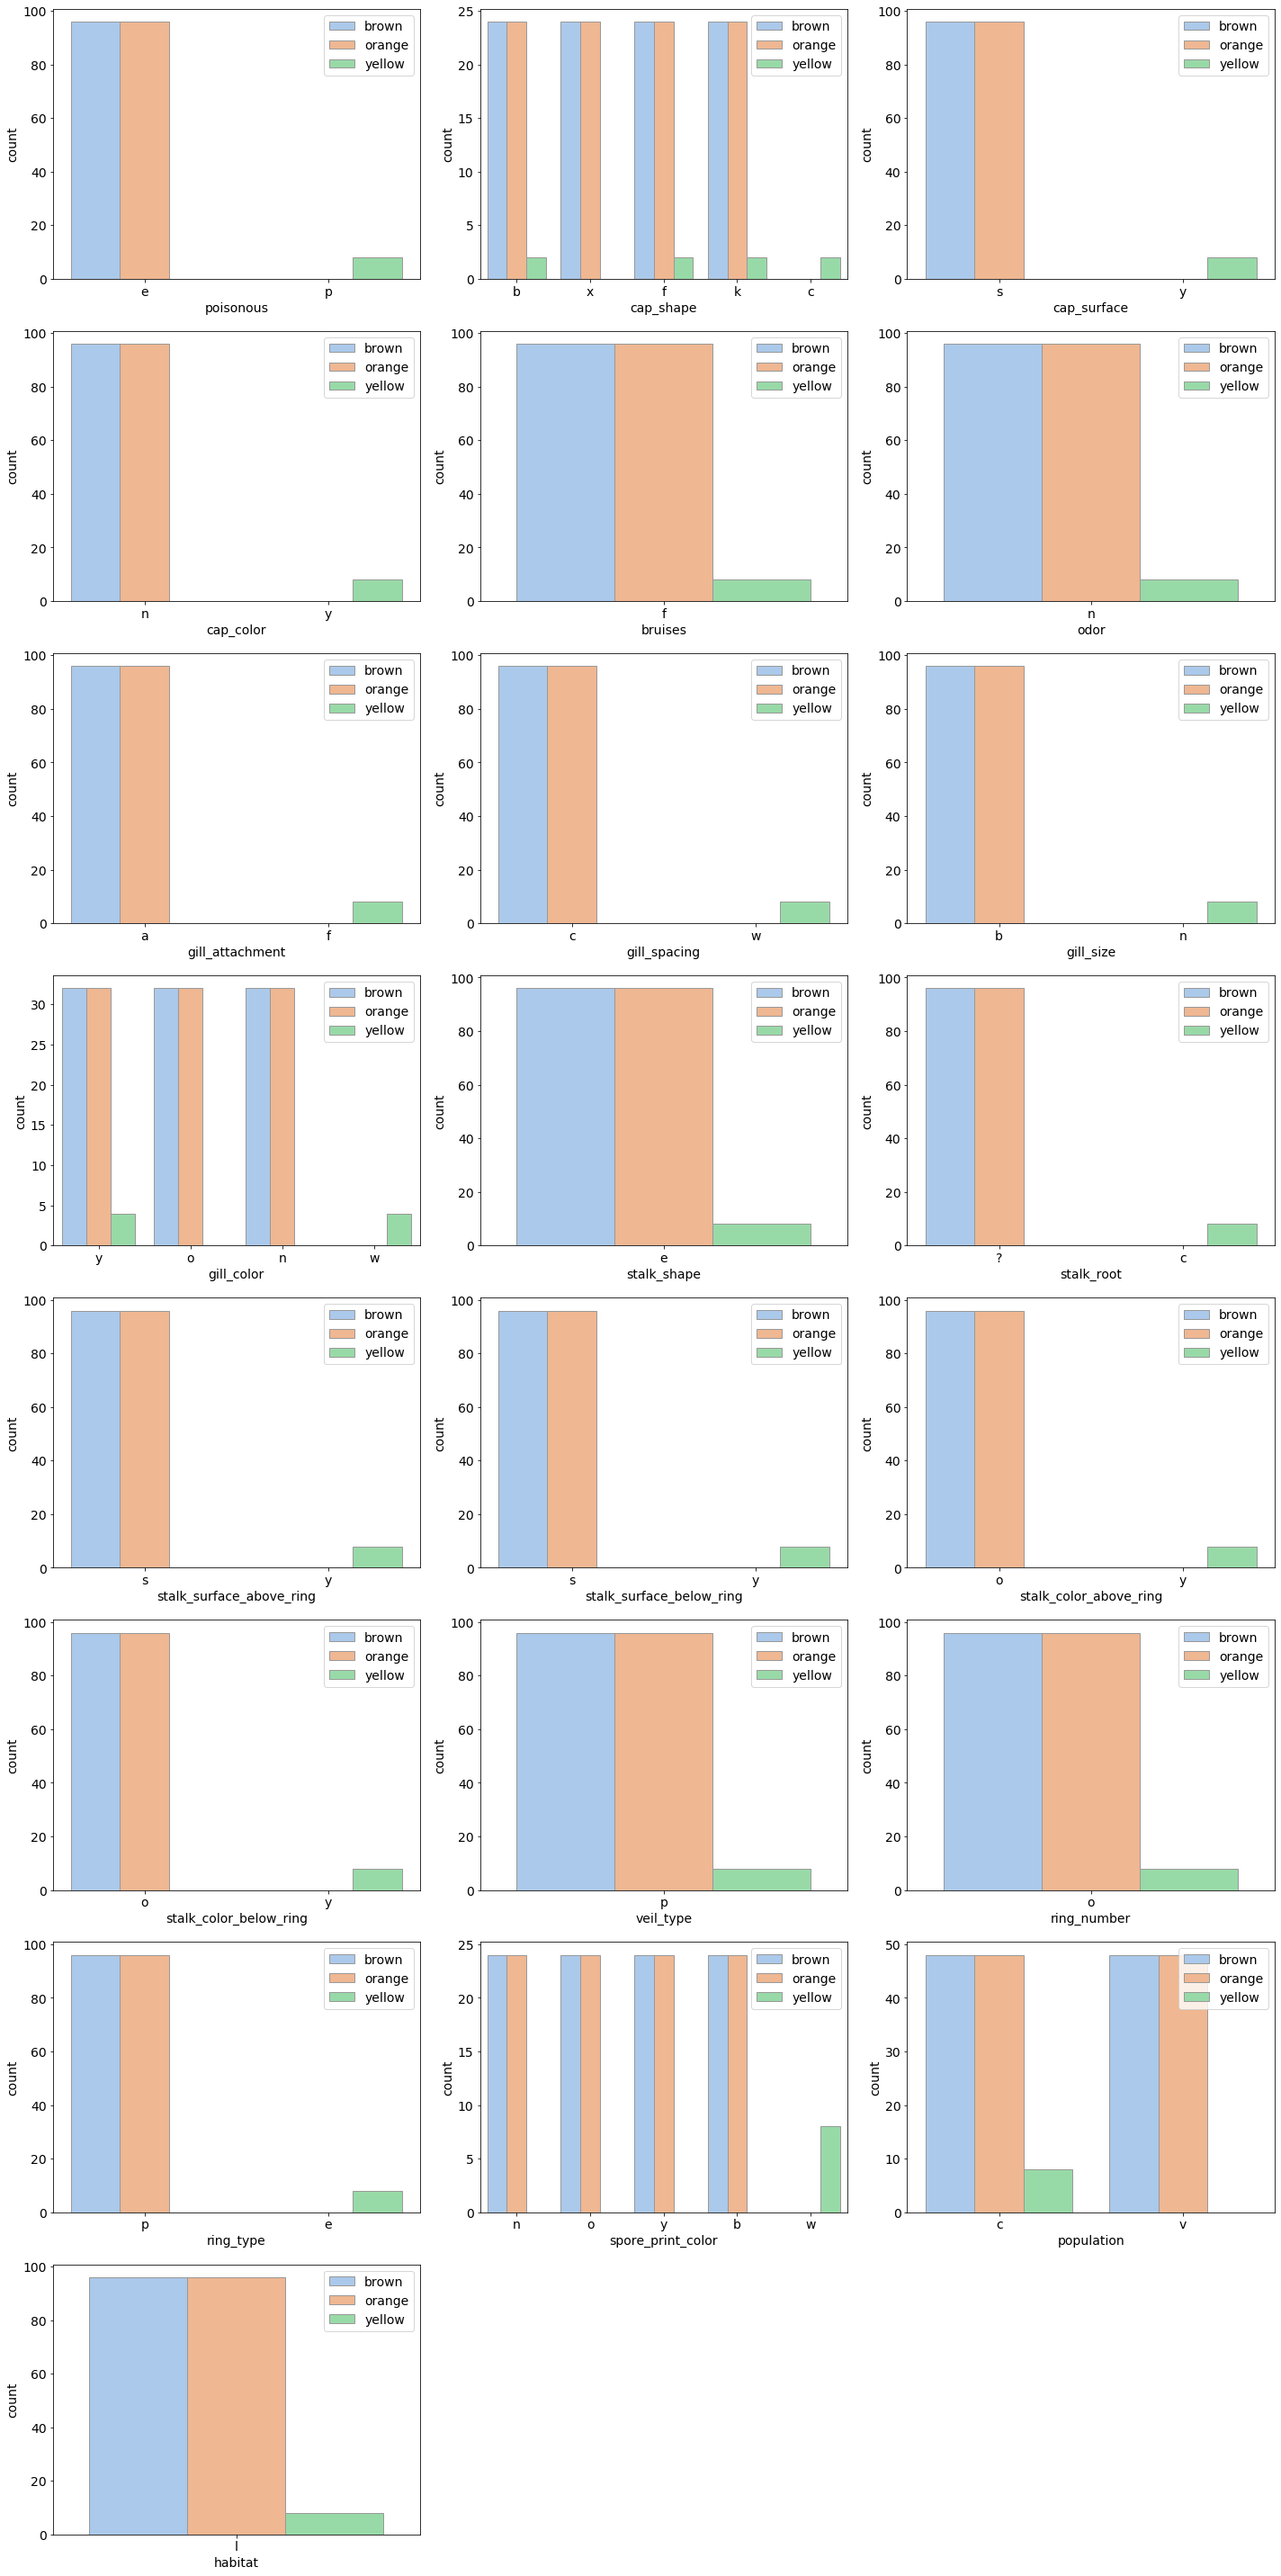

In [9]:
#graph these variables without a variable of white
plt.rcParams.update({'font.size': 14,'figure.figsize':(20,40)}) 

shrooms_sans_target = shrooms.drop(columns = 'veil_color')
j=1
#for each variable except the target graph a side by side plot 
for k in shrooms_sans_target.columns.to_list():   
    plt.subplot(8,3,j) 
    sns.countplot(x=k, hue="veil_color",  palette="pastel", edgecolor=".6",data=shrooms_not_white)
    plt.legend(loc='upper right')
    j=j+1

plt.tight_layout()
#show results
plt.show()

After looking at all of the charts, it seems that the brown and orange mushrooms have the exact same frequency for each of the variables. This means it would be very difficult for the model to predict one color versus the other. 

From the above we see that **poisonous** may be a good predictor for yellow mushrooms as all poisonous mushrooms have a yellow veil_color. Similarly, all brown and orange mushrooms are edible. 

We also see that a **cap_shape** of conical only has a veil_color of yellow, indicating this may be another good predictor. 

We see from above that all of the observations which have a stalk color above ring of yellow have a veil color that is yellow. From above we know that there were only 8 observations with a veil color of yellow, so this looks like an excellent predictor for a yellow veil color.

We also see that based on the distributions, many of the gill related and stalk surface variables seem to be dependent on the other, which could help us determine which variables to keep and which to exclude from our models. I will now perform chi-square tests of independence on these variables to test my theory. 

In [10]:
#import stats module to perform chi-square
from scipy import stats

#chi_sq independence test between certain variables
cap1 = stats.chi2_contingency(pd.crosstab(shrooms.cap_surface, shrooms.cap_color))[0:2]
gill1 = stats.chi2_contingency(pd.crosstab(shrooms.gill_attachment, shrooms.gill_spacing))[0:2]
gill2 = stats.chi2_contingency(pd.crosstab(shrooms.gill_size, shrooms.gill_spacing))[0:2]
gill3 = stats.chi2_contingency(pd.crosstab(shrooms.gill_attachment, shrooms.gill_size))[0:2]
stalk_surface1= stats.chi2_contingency(pd.crosstab(shrooms.stalk_surface_above_ring, shrooms.stalk_surface_below_ring))[0:2]
stalk_surface2= stats.chi2_contingency(pd.crosstab(shrooms.stalk_surface_above_ring, shrooms.stalk_color_above_ring))[0:2]
stalk_surface3= stats.chi2_contingency(pd.crosstab(shrooms.stalk_color_above_ring, shrooms.stalk_color_below_ring))[0:2]

print("The Chi-Square Test of Indepdence statistic and p-value for cap_surface and cap_color are:", cap1)
print("The Chi-Square Test of Indepdence statistic and p-value for gill_attachment and gill_spacing are:", gill1)
print("The Chi-Square Test of Indepdence statistic and p-value for gill_size and gill_spacing are:",gill2)
print("The Chi-Square Test of Indepdence statistic and p-value for gill_attachment and gill_size are:",gill3)
print("The Chi-Square Test of Indepdence statistic and p-value for stalk_surface_above_ring and stalk_surface_below_ring are:", stalk_surface1)
print("The Chi-Square Test of Indepdence statistic and p-value for stalk_surface_above_ring and stalk_color_above_ring are:", stalk_surface2)
print("The Chi-Square Test of Indepdence statistic and p-value for stalk_color_above_ring and stalk_color_below_ring are:", stalk_surface3)

The Chi-Square Test of Indepdence statistic and p-value for cap_surface and cap_color are: (1236.8289575086324, 1.237997544046076e-243)
The Chi-Square Test of Indepdence statistic and p-value for gill_attachment and gill_spacing are: (40.304300655027035, 2.1733003895611333e-10)
The Chi-Square Test of Indepdence statistic and p-value for gill_size and gill_spacing are: (94.70762562544303, 2.206873949766849e-22)
The Chi-Square Test of Indepdence statistic and p-value for gill_attachment and gill_size are: (95.01254684407188, 1.891823941904344e-22)
The Chi-Square Test of Indepdence statistic and p-value for stalk_surface_above_ring and stalk_surface_below_ring are: (5850.201063375509, 0.0)
The Chi-Square Test of Indepdence statistic and p-value for stalk_surface_above_ring and stalk_color_above_ring are: (6507.249696793064, 0.0)
The Chi-Square Test of Indepdence statistic and p-value for stalk_color_above_ring and stalk_color_below_ring are: (26187.865364996458, 0.0)


Contrary to my suspicion, the p-values of the above tests indicate that there is sufficient evidence to reject the null hypothesis that the two variables are independent. Therefore I cannot simply remove them. 

Next I will look at the results of chi-square tests for each variable as compared to the target variable.

In [11]:
#perform chi-square test
chi_sq=[]
var_name = shrooms_sans_target.columns.to_list()
#sessions_new.columns.tolist()
for i in range(len(var_name)):
    chi_sq.append([stats.chi2_contingency(pd.crosstab(shrooms.veil_color, shrooms.iloc[:,:-1].iloc[:,i]))[0:2],var_name[i]])
#sort results
chi_sq.sort(reverse=True)

#put results in a dataframe
chi_sq_df = pd.DataFrame(chi_sq,columns=['Chi_Sq_Value , P_value','Variable'])
chi_sq_df

,"Chi_Sq_Value , P_value",Variable
0,"(24372.0, 0.0)",ring_number
1,"(16247.999999999998, 0.0)",stalk_color_above_ring
2,"(10826.532054517918, 0.0)",stalk_color_below_ring
3,"(7410.803280225283, 0.0)",gill_attachment
4,"(6113.566996034579, 0.0)",population
5,"(5010.7901646886285, 0.0)",gill_color
6,"(2814.341820712534, 0.0)",stalk_surface_above_ring
7,"(1264.4988563161328, 2.2682193099326782e-260)",habitat
8,"(1227.8985745582568, 1.6617115877322068e-252)",cap_shape
9,"(556.1566758890359, 2.4077857928036304e-111)",stalk_root


Each of the variables has a chi square value with a p-value of less than .05, except for veil_type which is as expected since there is only one value for this variable. Unfortunately this does not help determine which variables can be removed prior to building my models. 

## Data Preparation

In this step I will first remove the columns that are not good predictors, including veil_type. Since all of the variables had identical distributions for brown and orange, I will also group the brown and orange values of veil_color into a new class called brown/orange. Intuitively, if you were drawing a physical decision tree and each branch led to both orange and brown, there is nothing you could use to distinguish the two veil_colors, so I do not believe I am removing information from the future models, but rather simplifying the process. In case this is not true, I will make this change in a copy of the dataset so that I can create models using this changed dataset as well as the original. I will then check this new dataframe for duplicates, and if there are, I will remove them. After doing some [research](https://www.edureka.co/community/58761/will-random-forest-algorithm-work-rows-have-duplicate-values) it makes sense that if you have duplicates, you will be giving these values more weight, so I would want to remove them to get rid of the bias. 

I considered grouping "sparse" values in other variables, meaning values where the only veil_color available was white. However, I came to the conclusion that this could be detrimental if new data introduced to the dataset did have a different characteristic, so I did not. 

I will also create two new calculated columns which combine the information from the the stalk above ring and stalk below ring variables (both surface and color). Each of the stalk_surface variables has the same values present, and the stalk_color variables also have the same color values therefore interpreting their results will not be made overly difficult. 

In [12]:
#drop veil_type column
shrooms_new = shrooms.drop(columns = 'veil_type')

#replace the values brown and orange with brown/orange to create a larger class since the groups are inseparable
shrooms_new["veil_color"].replace({"brown": "brown_orange" ,"orange": "brown_orange"}, inplace=True)

#check results
shrooms_new.veil_color.value_counts()

white           7924
brown_orange     192
yellow             8
Name: veil_color, dtype: int64

I see that there are now 192 brown_orange values, which is what I was expecting. Now I will check for duplicates and remove them if they exist.

In [13]:
#check for duplicates
shrooms_new.duplicated(subset=None, keep='first').sum()

96

In [14]:
#drop duplicates
shrooms_dedup = shrooms_new.drop_duplicates().copy()

#check results
shrooms_dedup.veil_color.value_counts()

white           7924
brown_orange      96
yellow             8
Name: veil_color, dtype: int64

As we can see, the brown and orange values were duplicates, and now we have one combined class of 96 values. Now I will create two new columns that combine the values for stalk_surface_above_ring and stalk_surface_below_ring as well as stalk_color_above_ring and stalk_color_below_ring in an attempt to reduce dimensionality. 

In [15]:
#combine the values to create a new column 
shrooms_dedup['stalk_surface_combo']=shrooms['stalk_surface_above_ring'] + shrooms['stalk_surface_below_ring']

#check results
shrooms_dedup.stalk_surface_combo.value_counts()

ss    4060
kk    1800
sk     504
ks     504
sf     324
fs     276
ff     276
sy     192
ky      68
yy      24
Name: stalk_surface_combo, dtype: int64

In [16]:
#combine the values to create a new column 
shrooms_dedup['stalk_color_combo']=shrooms['stalk_color_above_ring'] + shrooms['stalk_color_below_ring']

#check results
shrooms_dedup.stalk_color_combo.value_counts()

ww    3520
pp     768
wp     624
pw     624
gw     192
pg     192
gg     192
gp     192
wg     192
nn     160
pb     144
np     144
bn     144
bb     144
pn     144
nb     144
bp     144
oo      96
wn      64
ee      48
ew      48
we      48
cc      36
wy      16
yy       8
Name: stalk_color_combo, dtype: int64

In [17]:
#now get rid of the four original columns
shrooms_dedup = shrooms_dedup.drop(columns = ['stalk_color_above_ring', 'stalk_color_below_ring', 'stalk_surface_above_ring', 'stalk_surface_below_ring'])

## Prepped Data Review

Now I will do a quick EDA on this new dataframe, including the additional two columns and see if there are any noticeable differences.

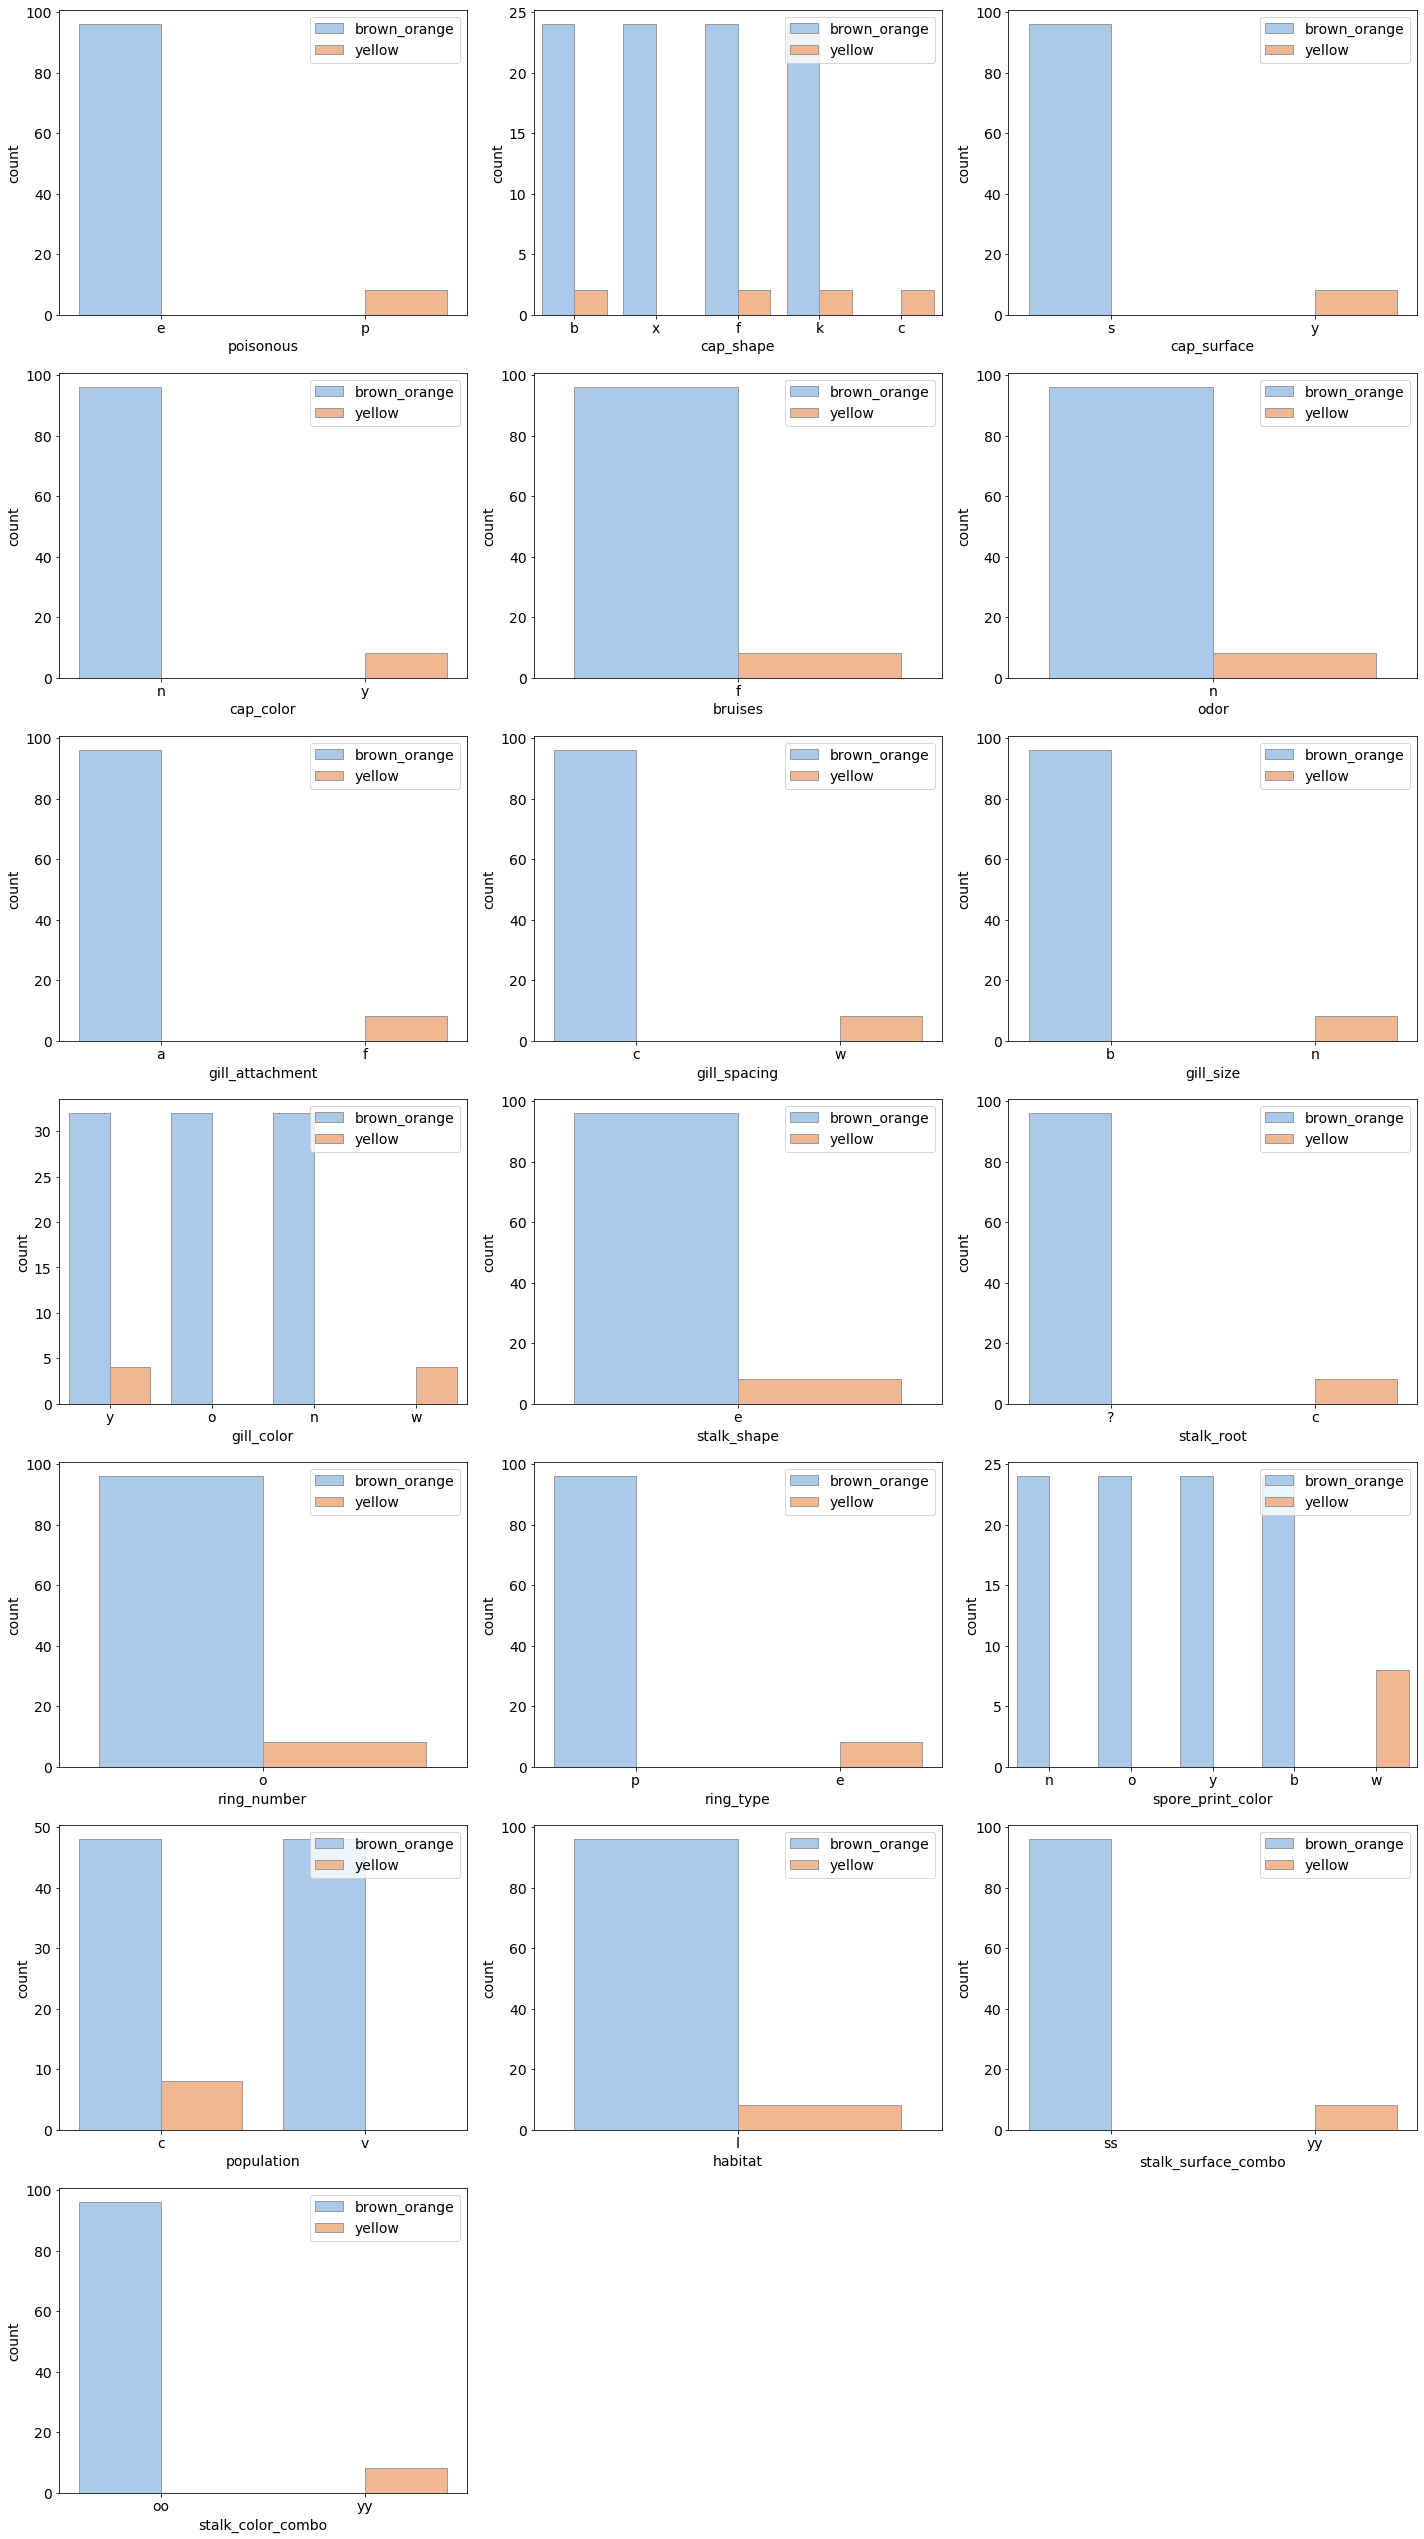

In [18]:
#graph these variables without a value of white
plt.rcParams.update({'font.size': 14,'figure.figsize':(20,40)}) 

shrooms_sans_target2 = shrooms_dedup.drop(columns = 'veil_color')
shrooms_not_white2 = shrooms_dedup[shrooms_dedup['veil_color'] != 'white']
j=1
#for each variable except the target graph a side by side plot 
for k in shrooms_sans_target2.columns.to_list():   
    plt.subplot(8,3,j) 
    sns.countplot(x=k, hue="veil_color",  palette="pastel", edgecolor=".6",data=shrooms_not_white2)
    plt.legend(loc='upper right')
    j=j+1

plt.tight_layout()
#show results
plt.show()

By combining the orange and brown classes, the graphs have become much easier to read, and the predictors have become more evident. There are many variables (ex. cap_surface) where there is a clear division of which value corresponds to which veil_color. 

Additionally, the two new variables show predictive value, a stalk_surface_combo value of smooth and smooth will lead to a brown/orange veil_color, while a stalk_surface_combo of scaly and scaly will lead to a veil_color of yellow.  A stalk_color_combo of orange and orange will lead to a brown/orange veil_color, while a combination of yellow and yellow will lead to a yellow veil_color. 

Now I will create these same columns in the original dataset and check the counts so that I can create models using the same features with both the original dataset and the modified, de-duplicated dataset. 

In [19]:
#drop veil_type column from original shrooms dataset since it won't be used
shrooms_og = shrooms.drop(columns = 'veil_type')

#combine the values to create a new column 
shrooms_og['stalk_surface_combo']=shrooms_og['stalk_surface_above_ring'] + shrooms_og['stalk_surface_below_ring']

#check results
shrooms_og.stalk_surface_combo.value_counts()

ss    4156
kk    1800
sk     504
ks     504
sf     324
fs     276
ff     276
sy     192
ky      68
yy      24
Name: stalk_surface_combo, dtype: int64

In [20]:
#combine the values to create a new column 
shrooms_og['stalk_color_combo']=shrooms_og['stalk_color_above_ring'] + shrooms_og['stalk_color_below_ring']

#check results
shrooms_og.stalk_color_combo.value_counts()

ww    3520
pp     768
wp     624
pw     624
oo     192
pg     192
gw     192
gg     192
wg     192
gp     192
nn     160
pb     144
np     144
bn     144
bb     144
pn     144
nb     144
bp     144
wn      64
ee      48
ew      48
we      48
cc      36
wy      16
yy       8
Name: stalk_color_combo, dtype: int64

In [21]:
#now get rid of the four original columns
shrooms_og = shrooms_og.drop(columns = ['stalk_color_above_ring', 'stalk_color_below_ring', 'stalk_surface_above_ring', 'stalk_surface_below_ring'])

#check results
shrooms_og

,poisonous,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_surface_combo,stalk_color_combo
0,p,x,s,n,t,p,f,c,n,k,e,e,white,o,p,k,s,u,ss,ww
1,e,x,s,y,t,a,f,c,b,k,e,c,white,o,p,n,n,g,ss,ww
2,e,b,s,w,t,l,f,c,b,n,e,c,white,o,p,n,n,m,ss,ww
3,p,x,y,w,t,p,f,c,n,n,e,e,white,o,p,k,s,u,ss,ww
4,e,x,s,g,f,n,f,w,b,k,t,e,white,o,e,n,a,g,ss,ww
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,orange,o,p,b,c,l,ss,oo
8120,e,x,s,n,f,n,a,c,b,y,e,?,brown,o,p,b,v,l,ss,oo
8121,e,f,s,n,f,n,a,c,b,n,e,?,orange,o,p,b,c,l,ss,oo
8122,p,k,y,n,f,y,f,c,n,b,t,?,white,o,e,w,v,l,sk,ww


Now that both of my datasets are ready, I will create the models. 

## Decision Tree + Random Forest Modeling

In this section I will be selecting my features and creating my models. Since I changed the dataset, and I am not sure about the changes I made, I am electing to train and test two datasets, one is the original, and the other is the modified. I will then compare to see if the changes I made helped or hurt my results. 

Although the classes are imbalanced, I will first try creating the models with imbalanced classes to see if I need to re-balance.

I will first split the two datasets into explanatory and target variables.

Next, I will split the data into test and training sets.

Then I will create two different models using Decision Trees and then two more models using Random Forest Classifiers. 

### Train/Test Split & Get Dummies

As stated above I will now prepare the data for the models by splitting the dataframes into explanatory and target variables. I will also get dummies for the explanatory variables. 

In [22]:
#define x_og as the explanatory variables from the original dataset
x_og = shrooms_og.drop(columns = 'veil_color')
y_og = shrooms_og['veil_color']

#define x_new as the explanatory variables from the modified dataset
x_new = shrooms_dedup.drop(columns = 'veil_color')
y_new = shrooms_dedup['veil_color']

In [23]:
#get dummies for x_og; drop first to ensure independence of columns
x_og = pd.get_dummies(x_og, drop_first = True)
x_new = pd.get_dummies(x_new, drop_first = True)

In [24]:
#get dummies for the y variables
y_og = pd.get_dummies(y_og)
y_new = pd.get_dummies(y_new)

Now that I have created the separate sets of explanatory and target variables and created dummies, I will split the data into test and train sets. 

In [25]:
#import libraries/modules
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics

#create train and test sets
x_train_og, x_test_og, y_train_og, y_test_og = train_test_split(x_og, y_og, test_size=0.3, random_state=0)
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new, test_size=0.3, random_state=0)

### Decision Tree 1 - Original Dataset

Now I will create my first model by first selecting the features I will use based on the EDA above.

The features I have selected are poisonous, cap_surface, cap_color, bruises, odor, stalk_color_combo, stalk_surface_combo since each of them seemed to be a clear predictor of veil_color based on the EDA.

In [26]:
#drop the columns not of interest
x1_train_og = x_train_og.drop(columns=['cap_shape_c', 'cap_shape_f', 'cap_shape_k', 'cap_shape_s', 'cap_shape_x',
                                       'gill_attachment_f', 'gill_spacing_w','gill_size_n','gill_color_e',
                                       'gill_color_g', 'gill_color_h','gill_color_k','gill_color_n','gill_color_o',
                                       'gill_color_p','gill_color_r','gill_color_u','gill_color_w','gill_color_y',
                                       'stalk_shape_t','stalk_root_b','stalk_root_c','stalk_root_e','stalk_root_r',
                                       'ring_number_o','ring_number_t','ring_type_f','ring_type_l',
                                       'ring_type_n','ring_type_p','spore_print_color_h','spore_print_color_k',
                                       'spore_print_color_n','spore_print_color_o','spore_print_color_r','spore_print_color_u',
                                       'spore_print_color_w','spore_print_color_y','population_c','population_n','population_s',
                                       'population_v','population_y','habitat_g','habitat_l','habitat_m','habitat_p','habitat_u','habitat_w'])

#check results
x1_train_og

,poisonous_p,cap_surface_g,cap_surface_s,cap_surface_y,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,...,stalk_color_combo_pn,stalk_color_combo_pp,stalk_color_combo_pw,stalk_color_combo_we,stalk_color_combo_wg,stalk_color_combo_wn,stalk_color_combo_wp,stalk_color_combo_ww,stalk_color_combo_wy,stalk_color_combo_yy
5314,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2075,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5165,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1155,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4448,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3264,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1653,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2607,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#import libraries/modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

#define and fit the model
dt1 = DecisionTreeClassifier()
dt1.fit(x1_train_og, y_train_og)

round(dt1.score(x1_train_og, y_train_og),4)

0.9896

In [28]:
from sklearn.metrics import multilabel_confusion_matrix

# prediction on train set
y_pred=dt1.predict(x1_train_og)

#get confusion matrix
multilabel_confusion_matrix(y_train_og, y_pred)

array([[[5627,    0],
        [  59,    0]],

       [[5562,   59],
        [   0,   65]],

       [[ 130,    0],
        [   0, 5556]],

       [[5680,    0],
        [   0,    6]]], dtype=int64)

In [29]:
#get the classification report
report1 = metrics.classification_report(y_train_og, y_pred, digits=3, output_dict=True)

#transpose it to a DataFrame
report_frame = pd.DataFrame(report1).transpose()

C:\Users\sheri\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
#check to see what columns correspond to the indices above
y_train_og.head(1)

,brown,orange,white,yellow
5314,0,0,1,0


In [31]:
#rename the columns to their respective veil_color
report_frame.rename(index={"0": "brown", "1": "orange", "2": "white", "3": "yellow"}, inplace=True, errors='ignore')

#show results
report_frame

,precision,recall,f1-score,support
brown,0.000000,0.000000,0.000000,59.0
orange,0.524194,1.000000,0.687831,65.0
white,1.000000,1.000000,1.000000,5556.0
yellow,1.000000,1.000000,1.000000,6.0
micro avg,0.989624,0.989624,0.989624,5686.0
macro avg,0.631048,0.750000,0.671958,5686.0
weighted avg,0.984184,0.989624,0.986055,5686.0
samples avg,0.989624,0.989624,0.989624,5686.0


From the classification report and confusion matrix we see that there were no predictions made for the veil_color brown. I suspect this is because of what I discovered during the the EDA that there is no way to distinguish between brown and orange. Hopefully the second model using the modified dataset will show appropriate results for the combined brown_orange class.

The precision for veil_color orange was also low, with .52, although there was a recall of 1. 

### Decision Tree 2 - Modified Dataset

Now I will create my second model by first selecting the same features as the first decision tree model, this time training the data on the modified dataset where I had combined the orange and brown classes and dropped the duplicates. 

In [32]:
#drop the columns not of interest
x1_train_new = x_train_new.drop(columns=['cap_shape_c', 'cap_shape_f', 'cap_shape_k', 'cap_shape_s', 'cap_shape_x',
                                       'gill_attachment_f', 'gill_spacing_w','gill_size_n','gill_color_e',
                                       'gill_color_g', 'gill_color_h','gill_color_k','gill_color_n','gill_color_o',
                                       'gill_color_p','gill_color_r','gill_color_u','gill_color_w','gill_color_y',
                                       'stalk_shape_t','stalk_root_b','stalk_root_c','stalk_root_e','stalk_root_r',
                                       'ring_number_o','ring_number_t','ring_type_f','ring_type_l',
                                       'ring_type_n','ring_type_p','spore_print_color_h','spore_print_color_k',
                                       'spore_print_color_n','spore_print_color_o','spore_print_color_r','spore_print_color_u',
                                       'spore_print_color_w','spore_print_color_y','population_c','population_n','population_s',
                                       'population_v','population_y','habitat_g','habitat_l','habitat_m','habitat_p','habitat_u','habitat_w'])

#check results
x1_train_new.head()

,poisonous_p,cap_surface_g,cap_surface_s,cap_surface_y,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,...,stalk_color_combo_pn,stalk_color_combo_pp,stalk_color_combo_pw,stalk_color_combo_we,stalk_color_combo_wg,stalk_color_combo_wn,stalk_color_combo_wp,stalk_color_combo_ww,stalk_color_combo_wy,stalk_color_combo_yy
5565,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
873,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5811,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6191,1,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4848,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [33]:
#define and fit the model
dt2 = DecisionTreeClassifier()
dt2.fit(x1_train_new, y_train_new)

#check results
round(dt2.score(x1_train_new, y_train_new),4)

1.0

In [34]:
# prediction on train set
y_pred2=dt2.predict(x1_train_new)

#get the confusion matrix
multilabel_confusion_matrix(y_train_new, y_pred2)

array([[[5553,    0],
        [   0,   66]],

       [[  70,    0],
        [   0, 5549]],

       [[5615,    0],
        [   0,    4]]], dtype=int64)

In [35]:
#get the classification report
report2 = metrics.classification_report(y_train_new, y_pred2, digits=3, output_dict=True)

#transpose it to a DataFrame
report_frame2 = pd.DataFrame(report2).transpose()

#rename the columns to their respective veil_color
report_frame2.rename(index={"0": "brown_orange", "1": "white", "2": "yellow"}, inplace=True, errors='ignore')

#show results
report_frame2

,precision,recall,f1-score,support
brown_orange,1.0,1.0,1.0,66.0
white,1.0,1.0,1.0,5549.0
yellow,1.0,1.0,1.0,4.0
micro avg,1.0,1.0,1.0,5619.0
macro avg,1.0,1.0,1.0,5619.0
weighted avg,1.0,1.0,1.0,5619.0
samples avg,1.0,1.0,1.0,5619.0


The modified dataframe has results more in line with what I was expecting. The model was able to correctly predict each of the brown_orange, white, and yellow veil_colors, and I have a precision and recall of 1 for each. This does lead me to believe the model might be overfitting, and may not perform as well on a test data set. 

Additionally, since our results are so strong, there does not seem to be a need to try and balance the classes. So I will continue to work with this modified dataset that does not contain duplicates.

### Random Forest 1 - Modified Dataset

Next I will create my first random forest model using 100 trees and using the same features as my decision trees above, using the modified dataset. Since the sample size is not incredibly large, and we have already achieved great performance using a simple decision tree, I felt that 100 was an appropriate selection. I will leave the remaining hyperparameters set to their default and gauge the performance. If necessary, I can then tweak these hyperparameters in my second model. 

In [36]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a classifier using 100 trees
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets
clf.fit(x1_train_new,y_train_new)

#check results
round(clf.score(x1_train_new, y_train_new))

1.0

In [37]:
#get the feature importance for each feature
for name, score in zip(x1_train_new, clf.feature_importances_):
    print(name, score)

poisonous_p 0.020122248149558968
cap_surface_g 0.0
cap_surface_s 0.07014331227368782
cap_surface_y 0.005353776250216839
cap_color_c 0.0002567981277051548
cap_color_e 0.003396277146082957
cap_color_g 0.007538459531908409
cap_color_n 0.036469337245128276
cap_color_p 0.00014598178171804365
cap_color_r 0.0
cap_color_u 0.0
cap_color_w 0.0037571028661490882
cap_color_y 0.001982723576634748
bruises_t 0.048796383455492254
odor_c 0.000270738991210205
odor_f 0.011032956520223106
odor_l 3.71074791211804e-05
odor_m 0.0
odor_n 0.025502057107917666
odor_p 2.293002907422135e-05
odor_s 0.005541893374542704
odor_y 0.001668051449028423
stalk_surface_combo_fs 0.0017721368367107427
stalk_surface_combo_kk 0.0005327330883165339
stalk_surface_combo_ks 0.0013282408738984845
stalk_surface_combo_ky 0.002470532619099112
stalk_surface_combo_sf 0.0017988984927866925
stalk_surface_combo_sk 0.000677966303083284
stalk_surface_combo_ss 0.022361531367387857
stalk_surface_combo_sy 5.984466564100687e-06
stalk_surface_com

As somewhat expected from our EDA, some of the included dummies, such as a cap_color value of 'r' or 'u', are not very important features at all. In our EDA we saw that these values had very small frequency in the dataset and were only associated with mushrooms with a white veil_color. 

Based on these results, for the next Random Forest Model, I will remove all of the cap_color related dummies since each of them have an importance of less than .04, which indicates they may not be needed in the model in order to achieve the same level of performance. While there are other variables that have a lower importance value, the dimensionality of the cap_color dummies is high so removing them should improve performance. I will now check the precision and recall scores for each of the veil_colors.

In [38]:
# prediction on train set
y_pred3=clf.predict(x1_train_new)

#get the confusion matrix
multilabel_confusion_matrix(y_train_new, y_pred3)

array([[[5553,    0],
        [   0,   66]],

       [[  70,    0],
        [   0, 5549]],

       [[5615,    0],
        [   0,    4]]], dtype=int64)

In [39]:
#get the classification report
report3 = metrics.classification_report(y_train_new, y_pred3, digits=3, output_dict=True)

#transpose it to a DataFrame
report_frame3 = pd.DataFrame(report3).transpose()

#rename the columns to their respective veil_color
report_frame3.rename(index={"0": "brown_orange", "1": "white", "2": "yellow"}, inplace=True, errors='ignore')

#show results
report_frame3

,precision,recall,f1-score,support
brown_orange,1.0,1.0,1.0,66.0
white,1.0,1.0,1.0,5549.0
yellow,1.0,1.0,1.0,4.0
micro avg,1.0,1.0,1.0,5619.0
macro avg,1.0,1.0,1.0,5619.0
weighted avg,1.0,1.0,1.0,5619.0
samples avg,1.0,1.0,1.0,5619.0


The above classification report shows that the Random Forest model performs just as well as the decision tree. While we would normally expect a random forest model to perform better than a decision tree, since the recall and precision for each veil_color was already 1, there was not any room for improvement.

Next I will try removing the variables identified above to see if there is any change in performance. 

### Random Forest 2 - Modified Dataset - Fewer Variables

As stated above, for this second random forest model, I will use all of the variables above except for the cap_color related dummies and see if the model's performance is affected. I will not adjust any of the hyperparameters or the number of trees since the first model performed so well. This will allow for an easier comparison of the models as well. 

In [40]:
x3_train_new = x1_train_new.drop(columns = ['cap_color_c', 'cap_color_e', 'cap_color_g', 'cap_color_n', 'cap_color_p',
                                         'cap_color_r', 'cap_color_u', 'cap_color_w', 'cap_color_y'])
x3_train_new.head()

,poisonous_p,cap_surface_g,cap_surface_s,cap_surface_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,...,stalk_color_combo_pn,stalk_color_combo_pp,stalk_color_combo_pw,stalk_color_combo_we,stalk_color_combo_wg,stalk_color_combo_wn,stalk_color_combo_wp,stalk_color_combo_ww,stalk_color_combo_wy,stalk_color_combo_yy
5565,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
873,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5811,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6191,1,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4848,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
#Create a classifier using 100 trees
clf2=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets 
clf2.fit(x3_train_new,y_train_new)

round(clf2.score(x3_train_new, y_train_new))

1.0

In [42]:
# prediction on train set
y_pred4=clf2.predict(x3_train_new)

#get the confusion matrix
multilabel_confusion_matrix(y_train_new, y_pred4)

array([[[5553,    0],
        [   0,   66]],

       [[  70,    0],
        [   0, 5549]],

       [[5615,    0],
        [   0,    4]]], dtype=int64)

In [43]:
#get the classification report
report4 = metrics.classification_report(y_train_new, y_pred4, digits=3, output_dict=True)

#transpose it to a DataFrame
report_frame4 = pd.DataFrame(report4).transpose()

#rename the columns to their respective veil_color
report_frame4.rename(index={"0": "brown_orange", "1": "white", "2": "yellow"}, inplace=True, errors='ignore')

#show results
report_frame4

,precision,recall,f1-score,support
brown_orange,1.0,1.0,1.0,66.0
white,1.0,1.0,1.0,5549.0
yellow,1.0,1.0,1.0,4.0
micro avg,1.0,1.0,1.0,5619.0
macro avg,1.0,1.0,1.0,5619.0
weighted avg,1.0,1.0,1.0,5619.0
samples avg,1.0,1.0,1.0,5619.0


Even after removing the cap_color related dummies, we have an equivalent performance. This tells me that my assumption that it was not an important feature was correct since the performance of the model did not suffer even after it was removed.

Now that I know this, I will see if applying the same features to the decision tree yields the same results, since the decision tree is simpler and less computationally expensive. 

### Decision Tree 3 - Modified Dataset - Fewer Features

Since the first decision tree was not really valid because it could not predict for the veil color brown, I will now create another decision tree using the modified dataset and removing the dummies related to cap_color as done in the random forest model 2 immediately above. 

In [44]:
#define and fit the model
dt3 = DecisionTreeClassifier()
dt3.fit(x3_train_new, y_train_new)

#check results
round(dt3.score(x3_train_new, y_train_new),4)

1.0

In [45]:
# prediction on train set
y_pred5=dt3.predict(x3_train_new)

#get the confusion matrix
multilabel_confusion_matrix(y_train_new, y_pred5)

array([[[5553,    0],
        [   0,   66]],

       [[  70,    0],
        [   0, 5549]],

       [[5615,    0],
        [   0,    4]]], dtype=int64)

In [46]:
#get the classification report
report5 = metrics.classification_report(y_train_new, y_pred5, digits=3, output_dict=True)

#transpose it to a DataFrame
report_frame5 = pd.DataFrame(report5).transpose()

#rename the columns to their respective veil_color
report_frame5.rename(index={"0": "brown_orange", "1": "white", "2": "yellow"}, inplace=True, errors='ignore')

#show results
report_frame5

,precision,recall,f1-score,support
brown_orange,1.0,1.0,1.0,66.0
white,1.0,1.0,1.0,5549.0
yellow,1.0,1.0,1.0,4.0
micro avg,1.0,1.0,1.0,5619.0
macro avg,1.0,1.0,1.0,5619.0
weighted avg,1.0,1.0,1.0,5619.0
samples avg,1.0,1.0,1.0,5619.0


The decision tree with the reduced number of features does perform equally as well as the other models, with a recall and precision of 1 for each veil_color. Next I will select my model and apply it to the testing dataset.

## Select Model

Now I will select my preferred model and compare / contrast its performance with that of my other models. 
I will then apply my preferred model to the testing dataset and evaluate its performance.



In [47]:
#concatenate the classification reports
result = pd.concat([report_frame2, report_frame3, report_frame4, report_frame5], axis=1, 
                   keys=['decision_tree2', 'random_forest1', 'random_forest2','decision_tree3'],).swaplevel(0, 1, 1)

#transpose to make it easier to read results
result = result.transpose()

#rename the columns to their respective veil_color
result.rename(columns={"0": "brown_orange", "1": "white", "2": "yellow"}, inplace=True, errors='ignore')

#drop the micro avg, macro avg, weighted avg, and samples avg columns as they are not of interest
result=result.drop(columns = ["micro avg", "macro avg", "weighted avg", "samples avg"]) 

#check results
result

,,brown_orange,white,yellow
precision,decision_tree2,1.0,1.0,1.0
recall,decision_tree2,1.0,1.0,1.0
f1-score,decision_tree2,1.0,1.0,1.0
support,decision_tree2,66.0,5549.0,4.0
precision,random_forest1,1.0,1.0,1.0
recall,random_forest1,1.0,1.0,1.0
f1-score,random_forest1,1.0,1.0,1.0
support,random_forest1,66.0,5549.0,4.0
precision,random_forest2,1.0,1.0,1.0
recall,random_forest2,1.0,1.0,1.0


From the above dataframe which combines the results of each of the models, we see that the performance is identical. Therefore, I will choose the model with the least variables, which is the simplest, since it will be the least computationally expensive. That is the decision tree 3 model.

### Test Data

Now that I have selected my model, I will apply it to the test data and evalute its performance. 

In [48]:
#create a copy of x_test
x_test1 = x_test_new.copy()

#create the dummies
x_test1 = pd.get_dummies(x_test1, drop_first = True)
y_test1 = pd.get_dummies(y_test_new)

#check results
x_test1.head()

,poisonous_p,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_g,cap_surface_s,cap_surface_y,cap_color_c,...,stalk_color_combo_pn,stalk_color_combo_pp,stalk_color_combo_pw,stalk_color_combo_we,stalk_color_combo_wg,stalk_color_combo_wn,stalk_color_combo_wp,stalk_color_combo_ww,stalk_color_combo_wy,stalk_color_combo_yy
4026,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7263,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
779,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
541,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2217,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
#drop the columns not of interest
x_test1 = x_test1.drop(columns=['cap_shape_c', 'cap_shape_f', 'cap_shape_k', 'cap_shape_s', 'cap_shape_x',
                                'gill_attachment_f', 'gill_spacing_w','gill_size_n','gill_color_e',
                                'gill_color_g', 'gill_color_h','gill_color_k','gill_color_n','gill_color_o',
                                'gill_color_p','gill_color_r','gill_color_u','gill_color_w','gill_color_y',
                                'stalk_shape_t','stalk_root_b','stalk_root_c','stalk_root_e','stalk_root_r',
                                'ring_number_o','ring_number_t','ring_type_f','ring_type_l',
                                'ring_type_n','ring_type_p','spore_print_color_h','spore_print_color_k',
                                'spore_print_color_n','spore_print_color_o','spore_print_color_r','spore_print_color_u',
                                'spore_print_color_w','spore_print_color_y','population_c','population_n','population_s',
                                'population_v','population_y','habitat_g','habitat_l','habitat_m','habitat_p','habitat_u',
                                'habitat_w','cap_color_c', 'cap_color_e', 'cap_color_g', 'cap_color_n', 'cap_color_p',
                                'cap_color_r', 'cap_color_u', 'cap_color_w', 'cap_color_y'])
#check results
x_test1.head()

,poisonous_p,cap_surface_g,cap_surface_s,cap_surface_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,...,stalk_color_combo_pn,stalk_color_combo_pp,stalk_color_combo_pw,stalk_color_combo_we,stalk_color_combo_wg,stalk_color_combo_wn,stalk_color_combo_wp,stalk_color_combo_ww,stalk_color_combo_wy,stalk_color_combo_yy
4026,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7263,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
779,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
541,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2217,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#use our model to predict values from the test set
pred_final = dt3.predict(x_test1)

#get the confusion matrix
multilabel_confusion_matrix(y_train_new, y_pred5)

array([[[5553,    0],
        [   0,   66]],

       [[  70,    0],
        [   0, 5549]],

       [[5615,    0],
        [   0,    4]]], dtype=int64)

In [51]:
#get the classification report
report_final = metrics.classification_report(y_test1, pred_final, digits=3, output_dict=True)

#transpose it to a DataFrame
report_final = pd.DataFrame(report_final).transpose()

#rename the columns to their respective veil_color
report_final.rename(index={"0": "brown_orange", "1": "white", "2": "yellow"}, inplace=True, errors='ignore')

#show results
report_final

,precision,recall,f1-score,support
brown_orange,1.0,1.0,1.0,30.0
white,1.0,1.0,1.0,2375.0
yellow,1.0,1.0,1.0,4.0
micro avg,1.0,1.0,1.0,2409.0
macro avg,1.0,1.0,1.0,2409.0
weighted avg,1.0,1.0,1.0,2409.0
samples avg,1.0,1.0,1.0,2409.0


As before, the precision and the recall for each of the veil_colors is 1. While I was expecting the model to overfit the data and therefore perform poorly on the test subset, that did not occur. It seems that with the given attributes chosen, the model can perfectly classify each of the yellow, brown_orange, and white veil_colors. 

## Conclusions

The target variable, veil_color, as we saw in the EDA, was very easy to predict given few variables. While I originally included 7 variables, I ended up choosing a model with 6 features. It could prove interesting in the future to continue limiting the number of features used to see if performance was impacted. As of now, with the given observations, a simple decision tree with 6 attributes was able to perfectly classify each of the veil_colors. While this seems like great news, if we were to introduce novel data, for example any observations with a different veil_type, but one of these same veil_colors, we might see different results, since the current dataset only has one veil_type. If this were to occur, I could use an oversampling technique like SMOTE to improve performance.